In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

### Sampling distribution for statistics

In [2]:
loans_income = pd.read_csv(r'data\loans_income.csv', squeeze=True)

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

C:\Users\dawid\AppData\Local\Temp\ipykernel_13764\844425245.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  loans_income = pd.read_csv(r'data\loans_income.csv', squeeze=True)


        income  type
10166  90000.0  Data
28524  66000.0  Data
48077  45000.0  Data
31027  75000.0  Data
26784  65000.0  Data


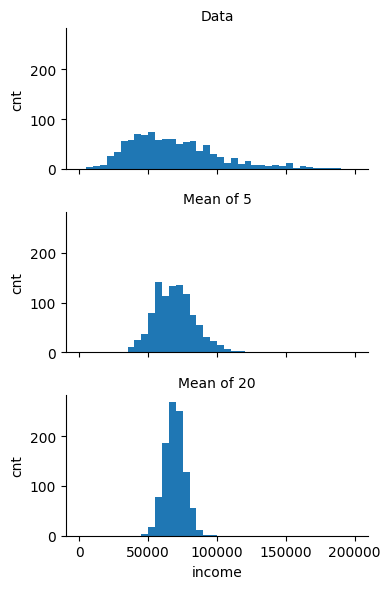

In [4]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('income', 'cnt')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

### Boodstrap

In [6]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap statistics:')
print(f'Old (median): {loans_income.median()}')
print(f'Bias: {results.mean() - loans_income.median()}')
print(f'Standard error (SE): {results.std()}')

Bootstrap statistics:
Old (median): 62000.0
Bias: -71.98750000000291
Standard error (SE): 210.9746166784825


### Confidence intervals

68760.51844
55734.1


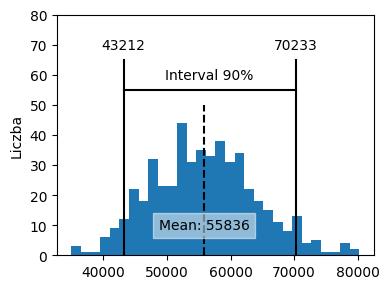

In [9]:
print(loans_income.mean())
np.random.seed(seed=3)  
# makes sample with 20 points
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, 'Interval 90%',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Liczba')

plt.tight_layout()
plt.show()

### Normal distribution - more it looks like this, we can assume that it is normal distribution

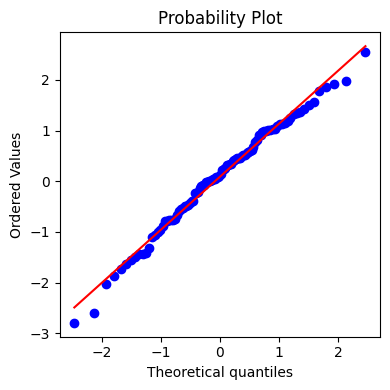

In [10]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

### Long-tailed distribution

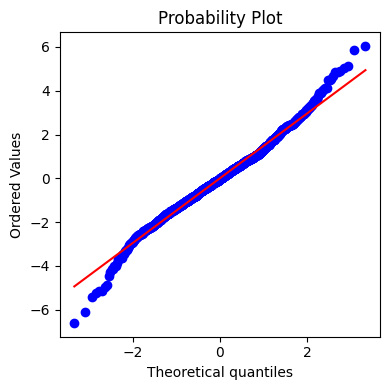

In [11]:
sp500_px = pd.read_csv(r'data\sp500_data.csv.gz')

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

### Poisson distribution

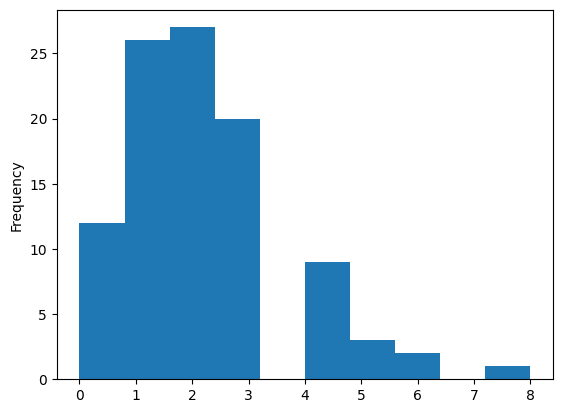

In [12]:
sample = stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist()
plt.show()

### Exponential decay

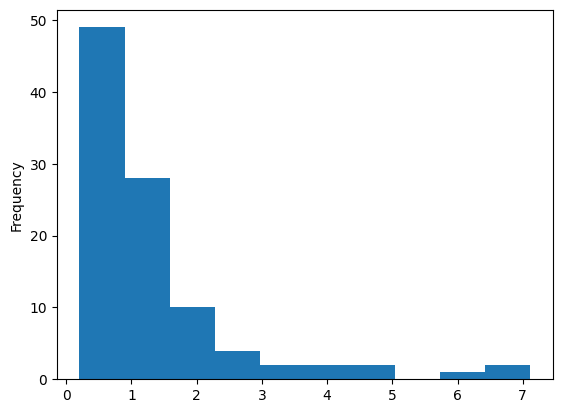

In [13]:
sample = stats.expon.rvs(0.2, size=100)

pd.Series(sample).plot.hist()
plt.show()